In [25]:
import numpy as np
from matplotlib import pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.datasets import mnist
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.models import Sequential
from keras.layers import Flatten
from keras.utils import to_categorical

# A. Setup (2 points). 

In this project we are going to create a Neural Network which will train on the MNIST dataset.

The Dataset contains 60000 Training images and 10000 Testing images and the images are from 10 classes.

You will be loading the MNIST datset in training and testing variables.

Display the first 10 images using Matplotlib 

Print the shape of the data points

Normalize the Data in [0,1] range.

Convert the labels into one hot code encoding

NOTES: Used the class example as a framework. Loaded the data, changed the color to be the default, and then normalized. Finally, did the one hot code encoding and printed out the final shape of our data.

(60000, 28, 28) (10000, 28, 28) (60000,) (10000,)
(60000, 784) (10000, 784) (60000, 10) (10000, 10)


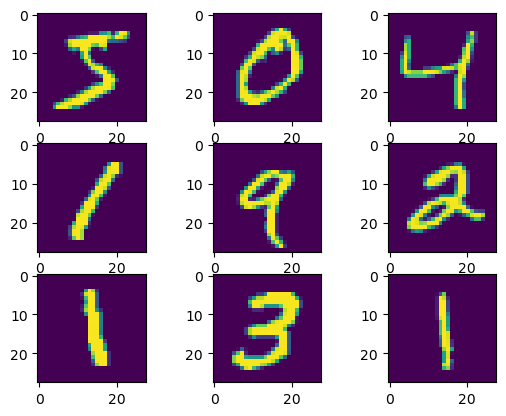

In [29]:
#TODO
#Load Data
(trainx, trainy),(testx, testy) = mnist.load_data()

#Display the Images
for i in range(9):
    plt.subplot(330+1+i)
    plt.imshow(trainx[i], cmap = plt.get_cmap())

#Print the shapes
print(trainx.shape, testx.shape, trainy.shape, testy.shape)

#Normalize the Datasets
trainx = trainx.reshape((trainx.shape[0],784))
testx = testx.reshape((testx.shape[0],784))
trainx = trainx/255.0
testx = testx/255.0

#Create the one hot code encoding for the labels
trainy= tf.keras.utils.to_categorical(trainy, 10)
testy= tf.keras.utils.to_categorical(testy, 10)
print(trainx.shape, testx.shape, trainy.shape, testy.shape)

# B. Creating a Dense Neural Network to train on this data. (4 Points)

In this section you will be creating a Neural Netwok based on the specifications
below. This exercise will help you create the network and help run the code.

Input Layer-> Flatten Layer that convert the image matrix to a vector

Hidden Layer->Dense Layer with 4 units and sigmoid activation

Output Layer-> Dense Layer with 10 units and softmax activation.

Print the Summary of the model at the end

Did as mentioned, added each layer with the correct specifications and printed the summary.

In [30]:
#TODO
image_size = 784
model = Sequential()
model.add(Flatten(input_shape=(image_size,)))
model.add(Dense(units=4, activation='sigmoid',))
model.add(Dense(units=10, activation='softmax'))
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_3 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 4)              │         3,140 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 10)             │            50 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,190 (12.46 KB)

 Trainable params: 3,190 (12.46 KB)

 Non-trainable params: 0 (0.00 B)

# Compile and Run the Model

Epoch 1/25
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.2824 - loss: 2.0951 - val_accuracy: 0.5682 - val_loss: 1.6623
Epoch 2/25
422/422 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5618 - loss: 1.6222 - val_accuracy: 0.6090 - val_loss: 1.3966
Epoch 3/25
422/422 ━━━━━━━━━━━━━━━━━━━━ 0s 992us/step - accuracy: 0.6177 - loss: 1.3872 - val_accuracy: 0.6883 - val_loss: 1.2034
Epoch 4/25
422/422 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6695 - loss: 1.2038 - val_accuracy: 0.7213 - val_loss: 1.0509
Epoch 5/25
422/422 ━━━━━━━━━━━━━━━━━━━━ 0s 974us/step - accuracy: 0.7039 - loss: 1.0723 - val_accuracy: 0.7635 - val_loss: 0.9394
Epoch 6/25
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7441 - loss: 0.9661 - val_accuracy: 0.7910 - val_loss: 0.8413
Epoch 7/25
422/422 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7723 - loss: 0.8751 - val_accuracy: 0.8028 - val_loss: 0.7661
Epoch 8/25
422/422 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7779 - loss: 0.8098 - val_accuracy

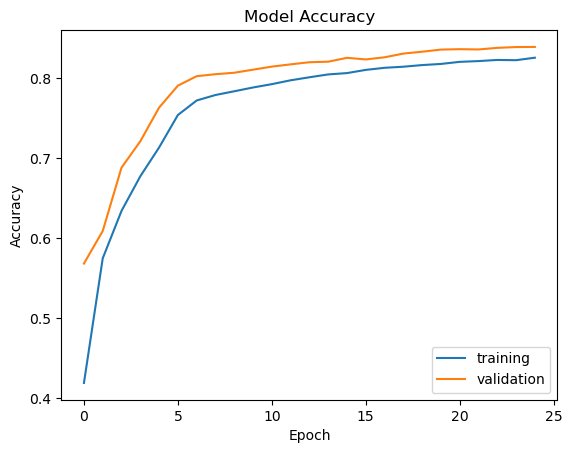

In [31]:
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=['accuracy'])
history=model.fit(trainx,trainy,batch_size=128, epochs=25, verbose= True,validation_split=0.1)
loss,accuracy=model.evaluate(testx,testy,verbose=False)

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['training','validation'],loc='best')
plt.show

print(f'Testloss: {loss:.3}')
print(f'Accuracy: {accuracy:.3}')

# Extra Credit (2 Points)
Create a Neural Network that will have more than 95% Training Accuracy

Changed the number of units on the sigmoid layer and it raised my accuracy up to .97 as of right now, but it seems I could get it a little higher by increasing up to even more.

In [34]:
#TODO
image_size = 784
model = Sequential()
model.add(Flatten(input_shape=(image_size,)))
model.add(Dense(units=40, activation='sigmoid',))
model.add(Dense(units=10, activation='softmax'))
model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_5 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 40)             │        31,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 10)             │           410 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 31,810 (124.26 KB)

 Trainable params: 31,810 (124.26 KB)

 Non-trainable params: 0 (0.00 B)

# Compile the Model again

Epoch 1/25
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6457 - loss: 1.4172 - val_accuracy: 0.9120 - val_loss: 0.4135
Epoch 2/25
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8996 - loss: 0.4226 - val_accuracy: 0.9340 - val_loss: 0.2734
Epoch 3/25
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9195 - loss: 0.3055 - val_accuracy: 0.9425 - val_loss: 0.2240
Epoch 4/25
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9283 - loss: 0.2657 - val_accuracy: 0.9478 - val_loss: 0.1962
Epoch 5/25
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9375 - loss: 0.2279 - val_accuracy: 0.9530 - val_loss: 0.1759
Epoch 6/25
422/422 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9414 - loss: 0.2073 - val_accuracy: 0.9570 - val_loss: 0.1614
Epoch 7/25
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9476 - loss: 0.1858 - val_accuracy: 0.9610 - val_loss: 0.1504
Epoch 8/25
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9520 - loss: 0.1737 - val_accuracy: 0.

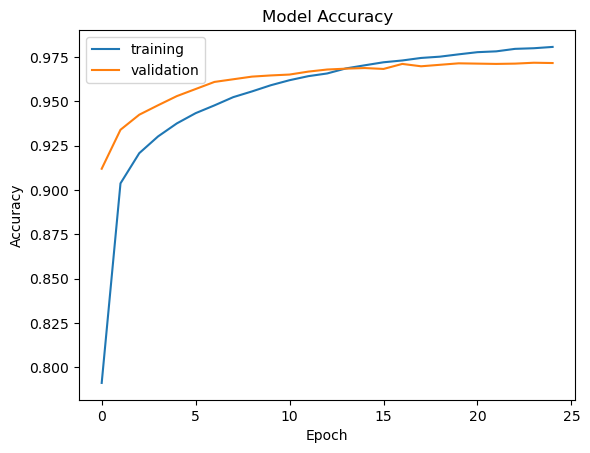

In [35]:
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=['accuracy'])
history=model.fit(trainx,trainy,batch_size=128, epochs=25, verbose= True,validation_split=0.1)
loss,accuracy=model.evaluate(testx,testy,verbose=False)

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['training','validation'],loc='best')
plt.show

print(f'Testloss: {loss:.3}')
print(f'Accuracy: {accuracy:.3}')

# C: Using Convolutions instead of all Dense Layers to train on Dataset    

# (4 Points)

Using the Dense Layer model, we achieved around 84% Accuracy. Lets see if
Convolution Layers can help improve the model.
Create a Neural Network model which will use Convolutional Layers to Learn
about the data. 

Acheive a Training Accuracy of 90% 

Found information on the library. I first reshaped the data so that it would fit my convolution layers. I use two convolution layers set to the size of my data, and then flatten and add in a dense layer at the end. Left it at the accuracy I was looking to keep.

In [54]:
#TODO
image_size = 784
trainx = trainx.reshape((trainx.shape[0],28, 28, 1))
testx = testx.reshape((testx.shape[0],28, 28, 1))
model = Sequential()
model.add(Conv2D(64, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((3, 3)))
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((3, 3)))
model.add(Flatten(input_shape=(image_size,)))
model.add(Dense(units=10, activation='softmax'))
model.summary()

Model: "sequential_23"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_21 (Conv2D)              │ (None, 26, 26, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_18 (MaxPooling2D) │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_22 (Conv2D)              │ (None, 6, 6, 32)       │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_19 (MaxPooling2D) │ (None, 2, 2, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_19 (Flatten)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 20,394 (79.66 KB)

 Trainable params: 20,394 (79.66 KB)

 Non-trainable params: 0 (0.00 B)

# Compile the Convolutional Neural Netowrk

Epoch 1/25
422/422 ━━━━━━━━━━━━━━━━━━━━ 8s 17ms/step - accuracy: 0.7607 - loss: 0.9426 - val_accuracy: 0.9690 - val_loss: 0.1073
Epoch 2/25
422/422 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - accuracy: 0.9637 - loss: 0.1221 - val_accuracy: 0.9783 - val_loss: 0.0740
Epoch 3/25
422/422 ━━━━━━━━━━━━━━━━━━━━ 8s 18ms/step - accuracy: 0.9728 - loss: 0.0899 - val_accuracy: 0.9750 - val_loss: 0.0813
Epoch 4/25
422/422 ━━━━━━━━━━━━━━━━━━━━ 8s 18ms/step - accuracy: 0.9784 - loss: 0.0690 - val_accuracy: 0.9863 - val_loss: 0.0537
Epoch 5/25
422/422 ━━━━━━━━━━━━━━━━━━━━ 8s 18ms/step - accuracy: 0.9824 - loss: 0.0578 - val_accuracy: 0.9872 - val_loss: 0.0513
Epoch 6/25
422/422 ━━━━━━━━━━━━━━━━━━━━ 8s 18ms/step - accuracy: 0.9847 - loss: 0.0513 - val_accuracy: 0.9897 - val_loss: 0.0417
Epoch 7/25
422/422 ━━━━━━━━━━━━━━━━━━━━ 8s 18ms/step - accuracy: 0.9870 - loss: 0.0429 - val_accuracy: 0.9867 - val_loss: 0.0510
Epoch 8/25
422/422 ━━━━━━━━━━━━━━━━━━━━ 8s 18ms/step - accuracy: 0.9871 - loss: 0.0401 - val_accu

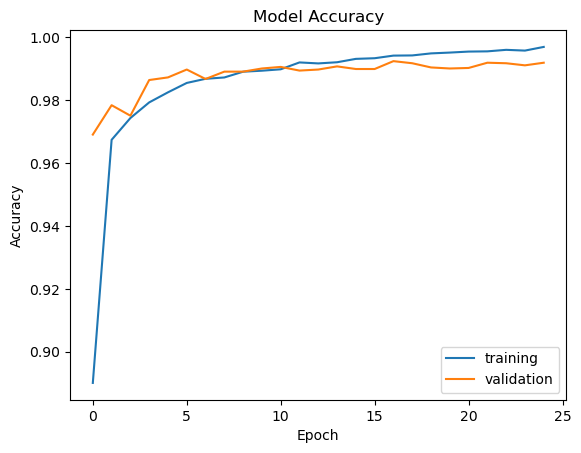

In [55]:
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=['accuracy'])
history=model.fit(trainx,trainy,batch_size=128, epochs=25, verbose= True,validation_split=0.1)
loss,accuracy=model.evaluate(testx,testy,verbose=False)

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['training','validation'],loc='best')
plt.show

print(f'Testloss: {loss:.3}')
print(f'Accuracy: {accuracy:.3}')